# Test of the SIMPLESequence
The generator for the SIMPLE data set is tested here.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import importlib
import simplegen

import numpy as np

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Settings
Set the plot settings

In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

# Data
Import training images

In [3]:
path_fixed = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLEA/train/0'
path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLED/train'
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLED/validation'
path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLED/test'

# Data Preparation
The generator sequence for training is built.

In [9]:
width = 224
height = 224
grid_width = 5
grid_height = 5

importlib.reload(simplegen)

train_gen = simplegen.SIMPLESequence(path_train, path_fixed,
                           batch_size=8,
                           image_ids=None,
                           preprocess_input=pre_une,
                           shuffle=True,
                           augment=False,
                           width=width,
                           height=height,
                           multi_channel='grad')


In [10]:
batch_index = 4

X, y = train_gen[batch_index]

image = X[batch_index]
#mask = y[batch_index]
#keypoints = y[batch_index]
keypoints = y[batch_index]

/home/julian/anaconda3/envs/endolas/lib/python3.8/site-packages/skimage/filters/rank/generic.py:118: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  image, selem, out, mask, n_bins = _handle_input(image, selem, out, mask,


In [11]:
X.shape

(8, 224, 224, 3)

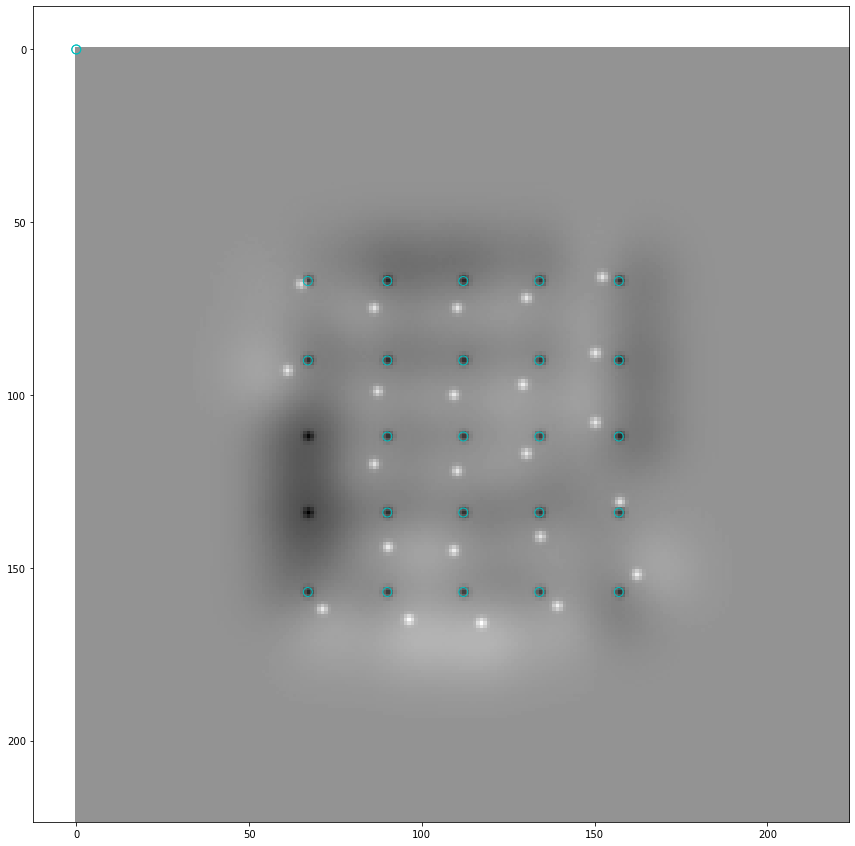

In [12]:
plt.clf()
plt.imshow(image[:,:,1], cmap="gray")

x_list = []
y_list = []

for index in range(25):    
    x = keypoints[index][0][1]
    y = keypoints[index][1][1]
    
    x_list.append(x)
    y_list.append(y)
    
    
plt.scatter(x_list, y_list,s=80,facecolors='none', edgecolors='c')

In [18]:
image[:,:,2].min()

-1.0